----

**Disciplina**: Redes Neurais Artificiais (RENEAR)

**Professor**: Dr. Francisco de Assis Boldt

**Programa**: Mestrado Profissional em Computação Aplicada

**Aluno**: Arthur Gomes da Vitoria

**Data de entrega**: 31/05/2020

----

**Exercício**: Implementar uma arquitetura clássica do perceptron para um problema binário sendo que essa deve estar em uma classe do tipo BaseEstimator (Ex.: Aula 10 de Reconhecimento de Padrões). Testar com uma base de dados binária do módulo datasets do scikit-learn (Ex.: load_breast_cancer). A entrega do trabalho deverá ser um link para sua implementação na conta do estudante no Github.

Dúvidas sobre a atividade serão tiradas no fórum do tópico no AVA.

**Solução**: 

No primeiro momento, estamos estudando o modelo de rede neural intitulado o mais simples que existe, o Perceptron de Camada Única, e isso pode ser visualizado
no seguinte link que possui diversas arquiteturas desde as mais simples até as mais complexas: https://www.asimovinstitute.org/neural-network-zoo/.

A medida que formos avançando na disciplina explorando modelos de redes neurais cada vez mais avançados e complexos, como as Redes Neurais Artificiais, acredito que vamos compreender ainda mais a importância desse momento, visto que a maioria desses modelos foram inspirados no Perceptron de Camada Única. Dessa forma, entender os seus fundamentos e compreender o modelo se torna uma tarefa importante inicialmente no aprendizado profundo (Deep Learning).

O Perceptron, inventado por Frank Rosenblatt no Cornell Aeronautical Laboratory na década de 60, é um classificador binário que processa uma ou mais entradas  para produzir uma saída, vale ressaltar que esse não possui camadas intermediárias. Apesar de simples esse apresenta algumas limitações específicas não sendo recomendada a sua utilização em soluções de problemas mais complexos, como dados que não são linearmente separáveis. Suas fraquezas inspiraram o desenvolvimento de modelos mais avançados de redes neurais.

O Perceptron classifica instâncias processando uma combinação linear entre as variáveis explicativas e os parâmetros do modelo utilizando uma função de ativação. Esses parâmetros são chamados de pesos sinápticos que expressam a importância, através de números reais, das variáveis de entrada para a saída. A intenção dessa arquitetura é aprender esses pesos de forma que a instância de saída produzida esteja correta para cada exemplo. Para isso, o algoritmo faz atualizações iterativas até chegar aos melhores pesos dado o conjunto de dados de entrada.

Embora existam diversas bibliotecas prontas com implementações de redes neurais como o Tensow Flow, o Keras, Pytorch entre outros no primeiro momento, a estratégia do professor de implementarmos uma rede neural mais simples utilizando alguma ferramenta, como por exemplo o Python, torna o processo de aprendizagem mais rico embora dê mais trabalho.

**CARREGANDO AS BIBLIOTECAS**

In [1]:
# Mlxtend (machine learning extensions)
!pip install mlxtend

In [0]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Imports de um conjunto de dados binário
from sklearn.datasets import load_iris

# Imports para customizar um classificador
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter

# Imports para visualização de dados
import matplotlib as m
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions  

# Imports para formatação dos gráficos
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
matplotlib.style.use('ggplot')
%matplotlib inline

In [0]:
# Contruindo o algoritmo do modelo Perceptron

class Perceptron(BaseEstimator, ClassifierMixin): 

    def __init__(self, eta = 0.1, epochs = 100): # Função de inicialização da classe

        self.eta = eta # eta = taxa de aprendizagem (learning rate) - valores entre 0 e 1
        self.epochs = epochs # epoch = número de passagens no conjunto de dados de treino

    def fit(self, X, y): # Etapa de treinamento

        self.w_ = np.zeros(1 + X.shape[1]) # Inicialização do vetor de peso com valores zerados as redes neurais posteriormente com o a base de treino vão aprender esses valores
        self.errors_ = [] # Lista vazia dos erros 

        for _ in range(self.epochs): # A cada passada os erros serão calculados e assim de acordo com a taxa de aprendizado o algoritmo aprenderá com eles 
        # e encontrará  os melhores valores para os pesos sinápticos e bias

            errors = 0 # Inicilizando o erro com zero para depois ser atualizado de acordo com as passadas
            
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) # O eta ajuda no tamanho da passada 
                self.w_[1:] +=  update * xi # Atualizando os valores dos pesos que iniciaramde forma aleatória e agora estão com valores reais 
                self.w_[0] +=  update #
                errors += int(update != 0.0)
            self.errors_.append(errors) # Guardando os erros a cada passada

        return self

    def predict(self, X): # Etapa de pre
        
      return np.where(np.dot(X, self.w_[1:]) + self.w_[0] >= 0.0, 1, 0) # Combinação linear das variáveis explicativas e bias com o vetor de pesose o resultado passará pela função de ativação

De forma a fazer uma comparação do desempenho  do modelo Perceptron vamos construir um algoritmo base que tende a ter o pior desempenho entre os algoritmos de classificação pois apenas pega o valor mais frequente na base de dados de treino e prevê que as novas observações se comportarão conforme a moda da base de treino algoritmo. 

In [0]:
# Construção do algoritmo ZeroR 

class ZeroR(BaseEstimator, ClassifierMixin):
  def __init__(self):
    pass
  def fit(self, X, y=None):
    self.answer = Counter(y).most_common(1)[0][0]
  def predict(self, X, y=None):
    return np.ones(X.shape[0])*self.answer

Agora vamos construir os modelos apresentando os algoritmos implementados ao conjunto de dados. Será utilizada a base de dados do módulo do scikit learn *iris dataset*, base com informações de classificações de plantas.

In [5]:
# Carregando os dados
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Com o DESC foi possível compreender o problema que estamos solucionando, em que o conjunto de dados possui 4 variáveis explicativas numéricas e uma variável depentende categória com 3 níveis. Como o problema que estamos buscando trabalhar é binário, converteremos as 3 classes em duas a planta é setosa ou não. Para fins de aplicação/aprendizado da técnica utilizaremos somente duas das 4 variáveis explicativas disponíveis para depois podermos visualizarmos o gráfico de dispersão com a linha estimada pelo modelo para separar os dados.

In [0]:
# Obtendo dados de duas classes: Setosa e Não Setosa
y = iris.target
y = np.where(y == 0, 0, 1)
X = iris.data[:, [0, 2]]

Dessa forma vamos construir os modelos passando os argumentos necessários, no caso do Perceptron a taxa de aprendizagem e o número de passadas pela base de treino. A métrica de avaliação do desempenho do modelo será a acurácia.

In [0]:
class PerformanceEvaluator():
  def __init__(self, X, y):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.40, random_state = 42)
  def score(self, clf):
    clf.fit(self.X_train,self.y_train)
    return clf.score(self.X_test,self.y_test)
  def evaluate(self, clfs):
    for name,clf in clfs:
      print('{:>25}: {}'.format(name,self.score(clf)))

# Criando os modelos
clfs = [
    ('Perceptron', Perceptron(epochs = 5, eta = 0.001)),
    ('ZeroR',ZeroR())
]

pe = PerformanceEvaluator(X,y)

In [9]:
pe.evaluate(clfs)

               Perceptron: 1.0
                    ZeroR: 0.6166666666666667


Devido a característica do problema que estamos tratando, isto é, linearmente separável, o Perceptron teve um desempenho satisfatório e superior ao modelo ZeroR. Dessa forma, vamos visualizar como ele separou as observações plotando o gráfico de regiões de decisão. Além disso, vamos observar como foi o desempenho do treinamento a cada passagem na base de treino.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 42)

# Criando e treinando o modelo
clf_Perceptron = Perceptron(epochs = 5, eta = 0.001)
clf_Perceptron.fit(X_train, y_train)

Perceptron(epochs=5, eta=0.001)

Pesos (Weights): [-0.001  -0.0025  0.0065]


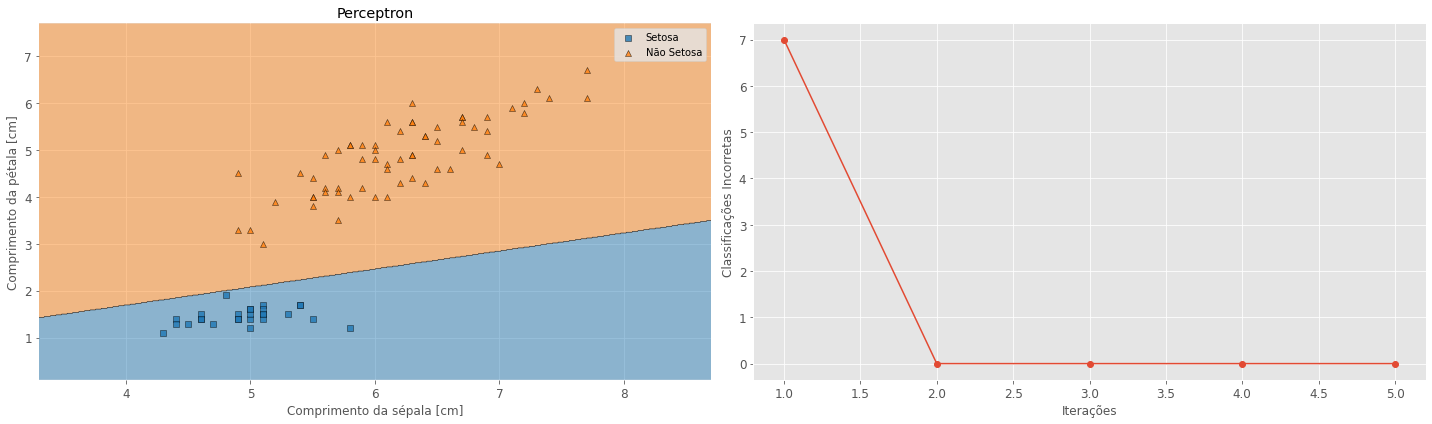

In [11]:
# Plot
print('Pesos (Weights): %s' % clf_Perceptron.w_)
rcParams['figure.figsize'] = 20, 6

# Plot
plt.subplot(121)
plot_decision_regions(X_train, y_train, clf = clf_Perceptron)
plt.title('Perceptron')
plt.xlabel('Comprimento da sépala [cm]')
plt.ylabel('Comprimento da pétala [cm]')
L = plt.legend()
L.get_texts()[0].set_text('Setosa')
L.get_texts()[1].set_text('Não Setosa')
plt.subplot(122)
plt.plot(range(1, len(clf_Perceptron.errors_)+1), clf_Perceptron.errors_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.tight_layout()

Conforme era esperado, devido ao desempenho na métrica de avaliação, o modelo Perceptron classificou perfeitamente as duas classes de flores Setosa e Não Setosa. No gráfico de iterações é possível perceber que a taxa de erro despencou na primeira passagem, isto quer dizer que com 1 iteração o modelo convergiu, isto é, encontrou os melhores valores para os parâmetros. As demais passagens foram apenas para corroborar com os valores já encontrados dos pesos sinapticos e bias. Essa etapa de número de passadas é extremamente importante pois pode causar tanto **underfitting** quanto **overfitting**.